# Tarea 1
## Alumno: Enrique Reyes; Profesor: Esteban Vargas
### 05/11/2020

<div style="text-align: justify">El conjunto de datos a análizar contiene información sobre el precio de las casas de Ames en Iowa con 79 variables explicativas con las que realizaremos un modelo de regresión (Lineal, Ridge y Lasso), para posteriormente predecir el precio de las casas con otro conjunto de datos.</div>

## 1. Carga de paquetes y datos

In [1]:
# Importamos las librerias
import pandas as pd # importar datos y analisis
import seaborn as sns # grafica de panel
import matplotlib.pyplot as plt # graficas 
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import math
import numpy as np
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Cargamos los datos de entrenamiento
ent = pd.read_csv("train.csv")
# Visualizamos los primeros elementos de la base de datos
ent.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Cargamos los datos de prueba
pru = pd.read_csv("test.csv")
# Visualizamos los ultimos datos de la base
pru.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Análisis exploratorio de datos

In [4]:
# Resumen de variables numericas
Datos=ent.iloc[:,1:81]
summary = Datos.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [5]:
# Resumen de variables categoricas
summary1 = Datos.describe(include=['object'])
summary1 = summary1.transpose()
summary1

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [6]:
# Identificamos las variables con valores faltante
faltantes = Datos.isna().sum()
faltantes[faltantes>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Los valores faltantes de esta variables los podríamos interpretar como:
* ***LotFrontage***: estas casas no tiene patio.
* ***Alley***: estas casas no tienen acceso al cajellón.
* ***MasVnrType***: las casas no tienen revestimiento de mampostería.
* ***MasVnrArea***: las casas no tienen revestimiento de mampostería.
* ***BsmtQual***: las casas no tienen sótano.
* ***BsmtCond***: las casas no tienen sótano.
* ***BsmtExposure***: las casas no tienen sótano o los sótanos no tienen exposición al patio.
* ***BsmtFinType1***: las casas no tienen sótano.
* ***BsmtFinType2***: las casas no tienen sótano o el área destinada al sótano no esta terminada.
* ***Electrical***: no cuenta con sistema eléctrico.
* ***FireplaceQu***: no tienen chimeneas.
* ***GarageType***: las casas no tienen garage.
* ***GarageYrBlt***: las casas no tienen garage.
* ***GarageFinish***: las casas no tienen garage.
* ***GarageQual***: las casas no tienen garage.
* ***GarageCond***: las casas no tienen garage.
* ***PoolQC***: las casas no cuentan con piscina.
* ***Fence***: las casas no tienen vallas.
* ***MiscFeature***: no cuenta con otros servicios adicionales como (elevador, segundo garage, otro cobertizo, cancha de tenis, entre otros).

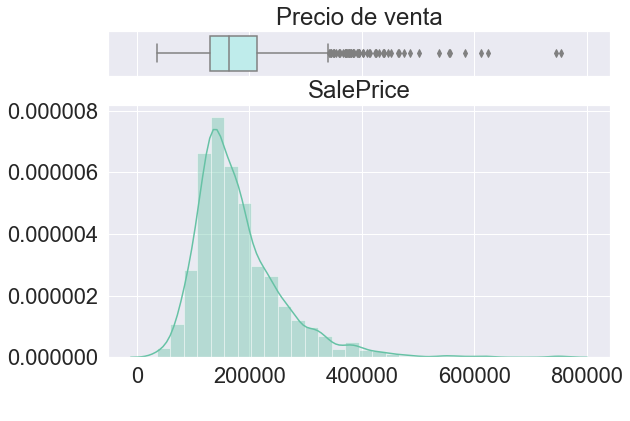

In [7]:
# Veamos el comportamiento de la varianble respuesta
Y = ent.iloc[:,80]

# Definimos una función para la visualización del histograma, la densidad y el boxplot de la variable respuesta
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,6), 
                      bins = None, saturation = 0.75, color1 = None, color2 = None):

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2, saturation=saturation, color=color1)
    sns.distplot(data, ax=ax_hist2, bins=bins, color=color2) if bins else sns.distplot(data, ax=ax_hist2, color=color2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

# aplicamos la funcion
histogram_boxplot(Y, bins = 30, title = 'Precio de venta', xlabel = ' ', saturation = 0.8, 
                  color1 = sns.color_palette("pastel")[9], color2 = sns.color_palette("Set2")[0])

En este caso vemos que los precios de las casas tienen valores muy altos que van de los 34900.00 hasta los 755000.00 dolares, en cambio las demás variables toman valores más pequeños, entonces veremos como se comporta la variable si mitigamos el rango posible de valores, para ello usaremos una transformación usual el logaritmo natudal.

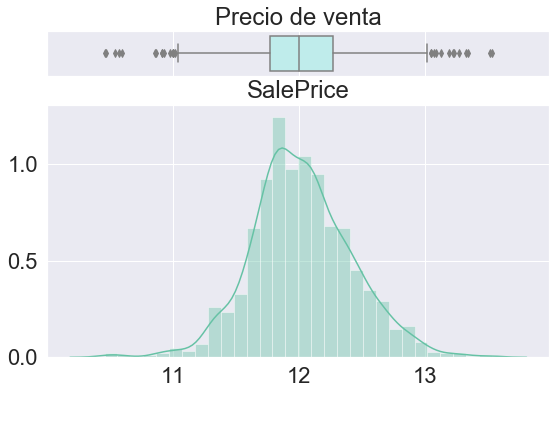

In [8]:
# Como los precios toman valores muy altos, aplicamos una transformacion usual como lo es el logaritmo natural
Ylog = np.log(ent.iloc[:,80])
# pintamos una vez más las 3 graficas
histogram_boxplot(Ylog, bins = 30, title = 'Precio de venta', xlabel = ' ', saturation = 0.8, 
                  color1 = sns.color_palette("pastel")[9], color2 = sns.color_palette("Set2")[0])

Si usamos el logaritmo la variable parece ser un poco más estable, en el sentido de que la densidad de los presios de venta parencen ser más simétricos.

In [9]:
# ahora veremos las correlaciones entre todas las variables para ver cuales considerariamos en un ajuste linea
corr1 = Datos.corr()
corr1.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26


Una criterio inicial para elegir a las covariables que pueden explicar a los precios de las casas en forma lineal, sería elegir a las variables con mayor correlación lineal con respecto a SalePrice, aunque debemos considerar que estas variables covariables pueden estar correlacionadas entre sí y esto causaría problemas de multicolinealidad.
<p> </p>
Entonces las variables a considerar serían:
<ul>
    <li>OverallQual ($\rho=0.79$)</li>
    <li>GrLivArea ($\rho=0.71$)</li>
    <li>GarageCars ($\rho=0.64$)</li>
    <li>GarageArea ($\rho=0.62$)</li>
    <li>TotalBsmtSF ($\rho=0.61$)</li>
    <li>1stFlrSF ($\rho=0.61$)</li>
    <li>FullBath ($\rho=0.56$)</li>
    <li>TotRmsAbvGrd ($\rho=0.56$)</li>
    <li>YearBuilt ($\rho=0.52$)</li>
    <li>YearRemodAdd ($\rho=0.51$)</li>
    <li>GarageYrBlt ($\rho=0.49$)</li>
    <li>MasVnrArea ($\rho=0.48$)</li>
    <li>Fireplaces ($\rho=0.47$)</li>
</ul>

In [10]:
Posibles=Datos.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
            'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','SalePrice']]
Posibles.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,SalePrice
OverallQual,1.00,0.59,0.60,0.56,0.54,0.48,0.55,0.43,0.57,0.55,0.55,0.41,0.40,0.79
GrLivArea,0.59,1.00,0.47,0.47,0.45,0.57,0.63,0.83,0.20,0.29,0.23,0.39,0.46,0.71
GarageCars,0.60,0.47,1.00,0.88,0.43,0.44,0.47,0.36,0.54,0.42,0.59,0.36,0.30,0.64
GarageArea,0.56,0.47,0.88,1.00,0.49,0.49,0.41,0.34,0.48,0.37,0.56,0.37,0.27,0.62
TotalBsmtSF,0.54,0.45,0.43,0.49,1.00,0.82,0.32,0.29,0.39,0.29,0.32,0.36,0.34,0.61
1stFlrSF,0.48,0.57,0.44,0.49,0.82,1.00,0.38,0.41,0.28,0.24,0.23,0.34,0.41,0.61
FullBath,0.55,0.63,0.47,0.41,0.32,0.38,1.00,0.55,0.47,0.44,0.48,0.28,0.24,0.56
TotRmsAbvGrd,0.43,0.83,0.36,0.34,0.29,0.41,0.55,1.00,0.10,0.19,0.15,0.28,0.33,0.53
YearBuilt,0.57,0.20,0.54,0.48,0.39,0.28,0.47,0.10,1.00,0.59,0.83,0.32,0.15,0.52
YearRemodAdd,0.55,0.29,0.42,0.37,0.29,0.24,0.44,0.19,0.59,1.00,0.64,0.18,0.11,0.51


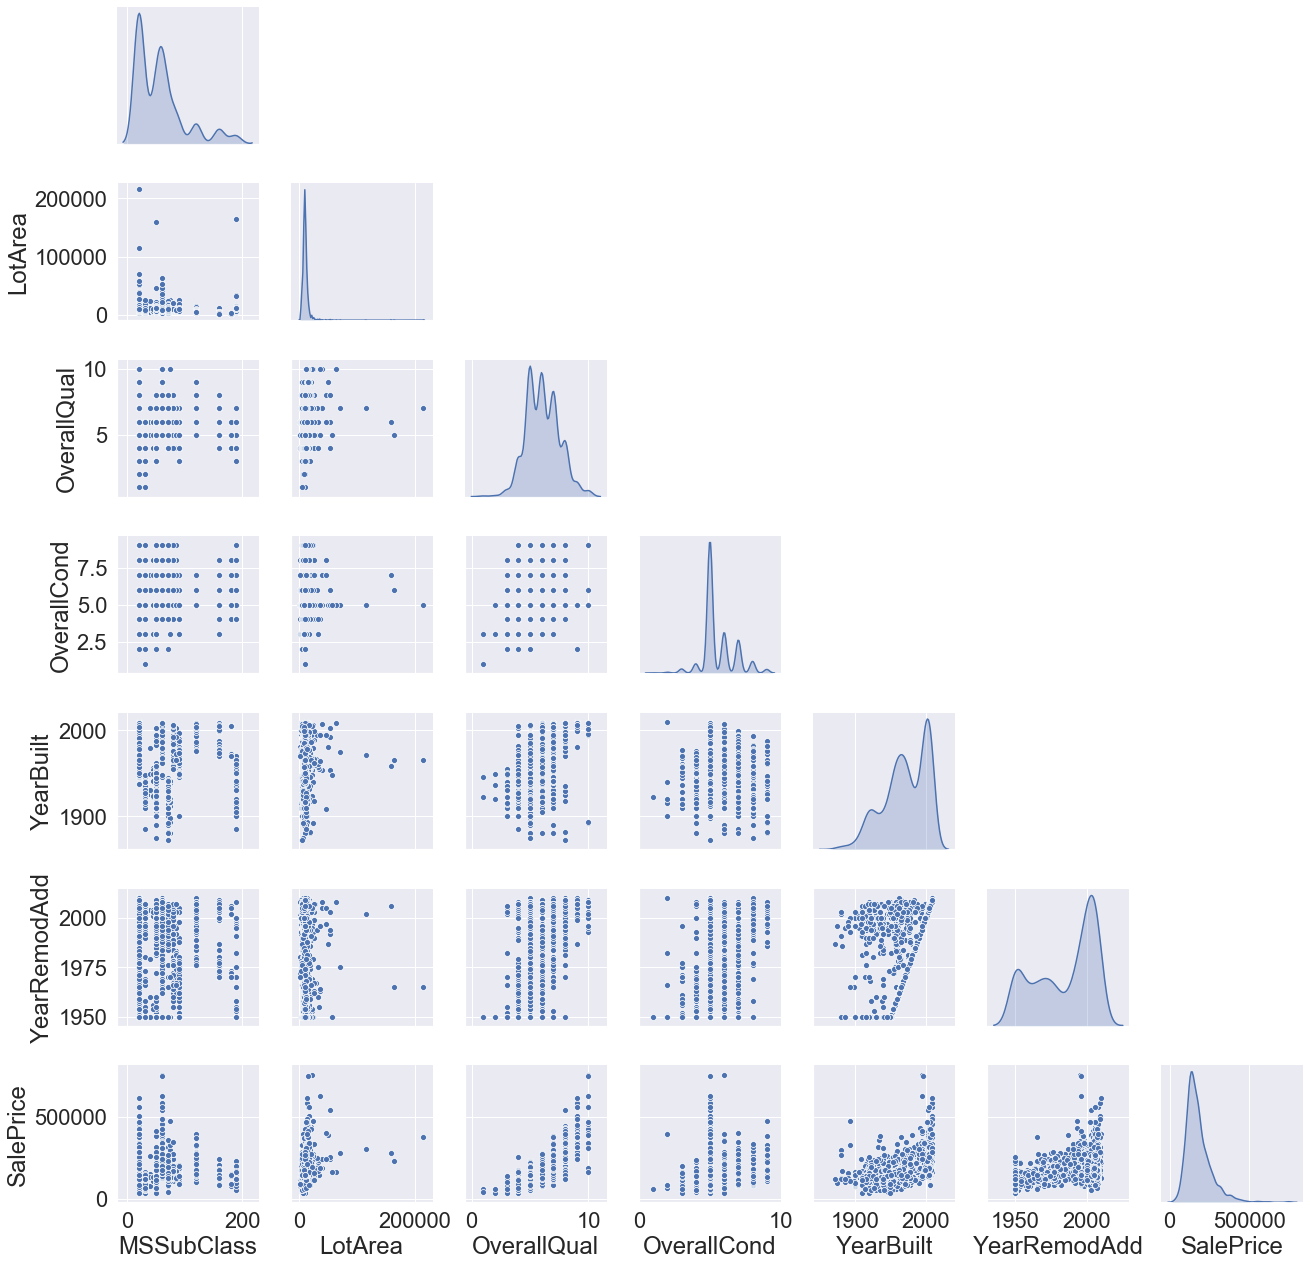

In [11]:
# Vamos a hacer una grafica de panel para ver como se comportan las variables explicativas
# con respecto a los precios de venta de las casas
nument1 = ent.loc[:,['MSSubClass','LotArea','OverallQual','OverallCond',
                     'YearBuilt','YearRemodAdd','SalePrice']]
sns.pairplot(nument1, diag_kind = 'kde', corner=True)

<div style="text-align: justify">Las variables que OverallQual tiene la mayor correlación con SalePrice, además de que la gráfica de dispersion entre estas variables si parece tener un cierto comportamiento lineal, entonces esta parece ser una buena candidata a ser considerada dentro de un modelo de regresión, por otra parte las variables YearBuilt y YearRemodAd tienen correlación por arriba del 0.5 y apenas se alcanza a percibir un cierto comportamiento lineal, pero se difumina por la alta variabilidad interna; entonces si consideramos a estas variables al mismo tiempo podemos tener problemas de multicolinealidad ya que la correlación entre estas variables ($\rho=0.59$) es mayor que la correlación que tiene cada variable con la variable respuesta, por lo tanto si deberíamos considerarlas con cierta cautela.</div>

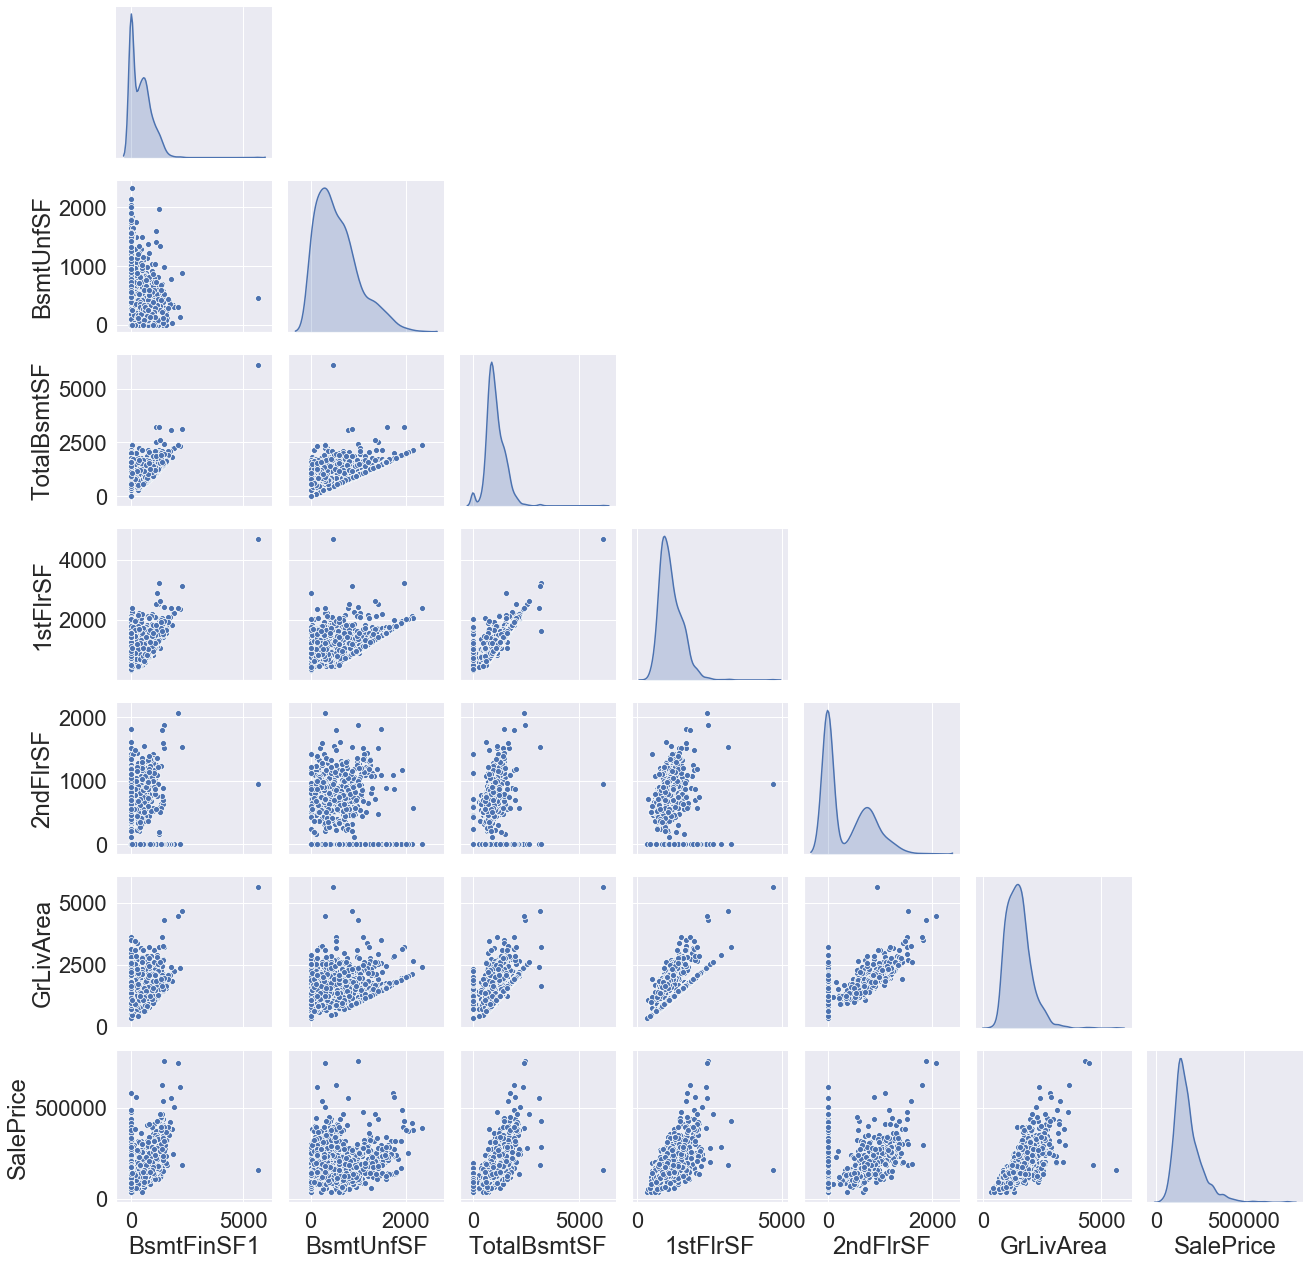

In [12]:
# Procedemos a graficar el panel pero con otro conjunto de variables
nument2 = ent.loc[:,['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                     '2ndFlrSF','GrLivArea','SalePrice']]
sns.pairplot(nument2, diag_kind = 'kde', corner=True)

Con este nuevo conjunto de variables parece ser que GrLivArea explica mejor a la variable respuesta, y en segundo lugar encontramos a dos variables TotalBsmtSF y 1stFlrSF, pero estas variables tienen una alta correlacion ($\rho=0.82$), por lo tanto si consideramos a las dos variables podemos tener problemas en el ajuste del modelo.

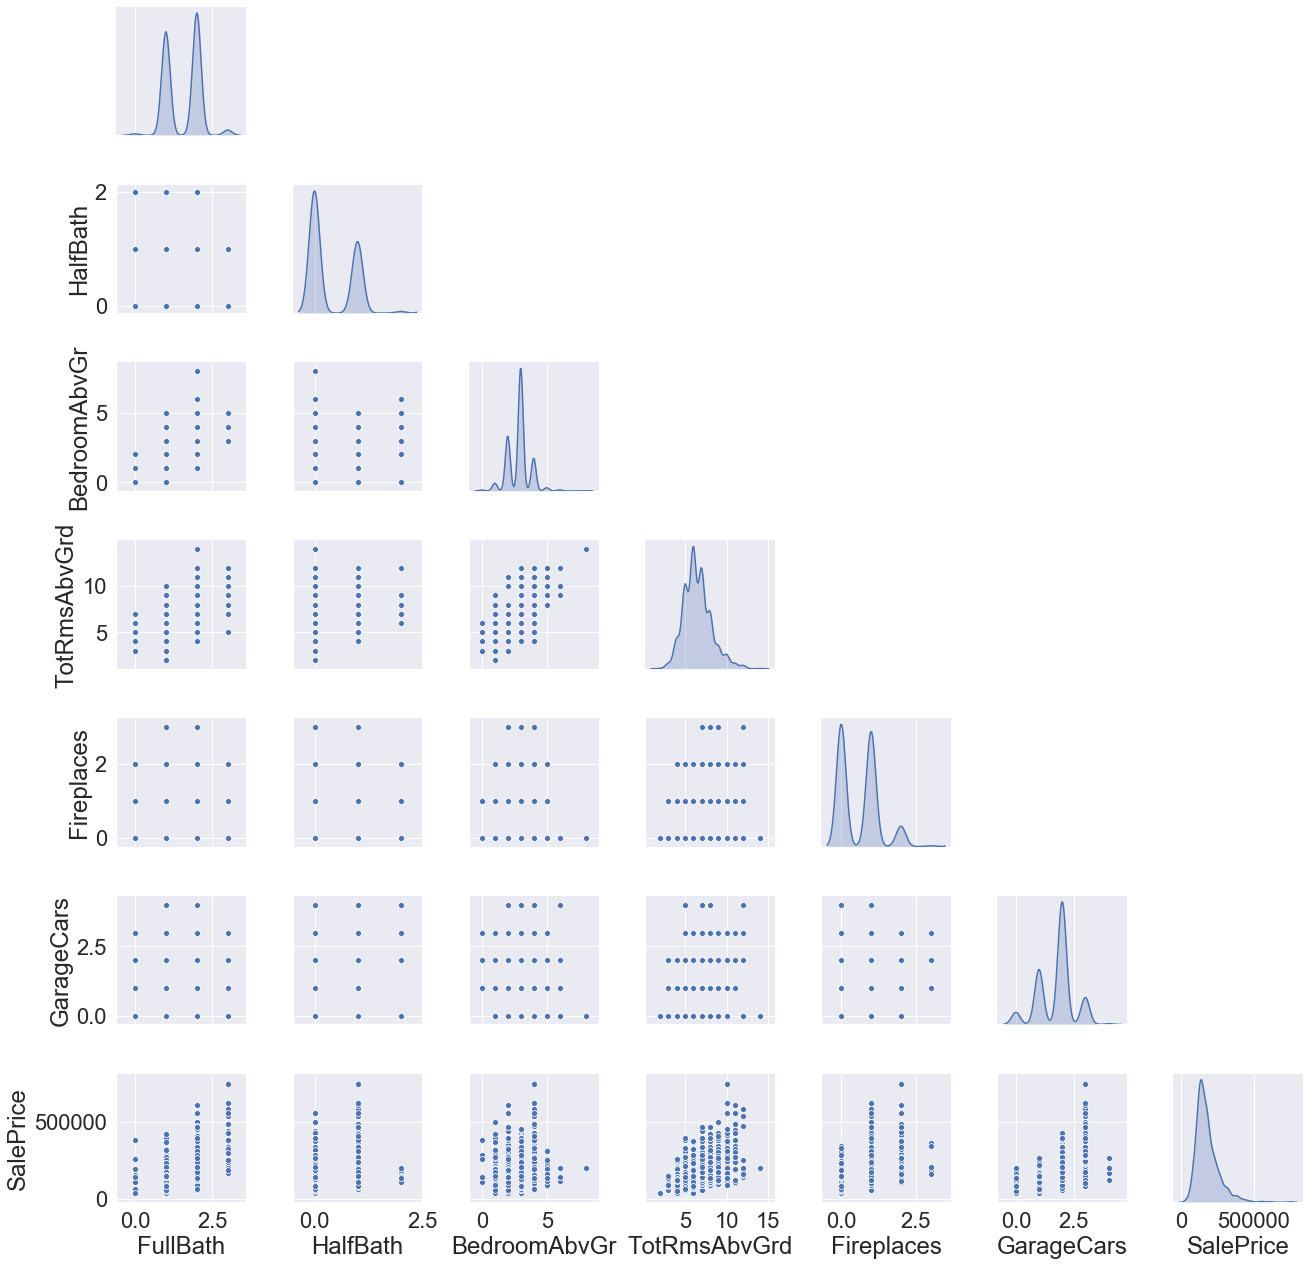

In [13]:
# Una vez más pintamos el panel para ver el comportamiento lineal 1 a 1 entre las variables
nument3 = ent.loc[:,['FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd',
                     'Fireplaces','GarageCars','SalePrice']]
sns.pairplot(nument3, diag_kind = 'kde', corner=True)

Una vez más, vemos tres variables que parecen tener un comportamiento aparentemente lineal con respecto al precio de venta de las casas, las correlaciones más altas son FullBath, TotRmsAbvGrd, GarageCars. La correlación entre FullBath, TotRmsAbvGrd tienen correlación similar entre estas y cada una contra la variable explicativa.

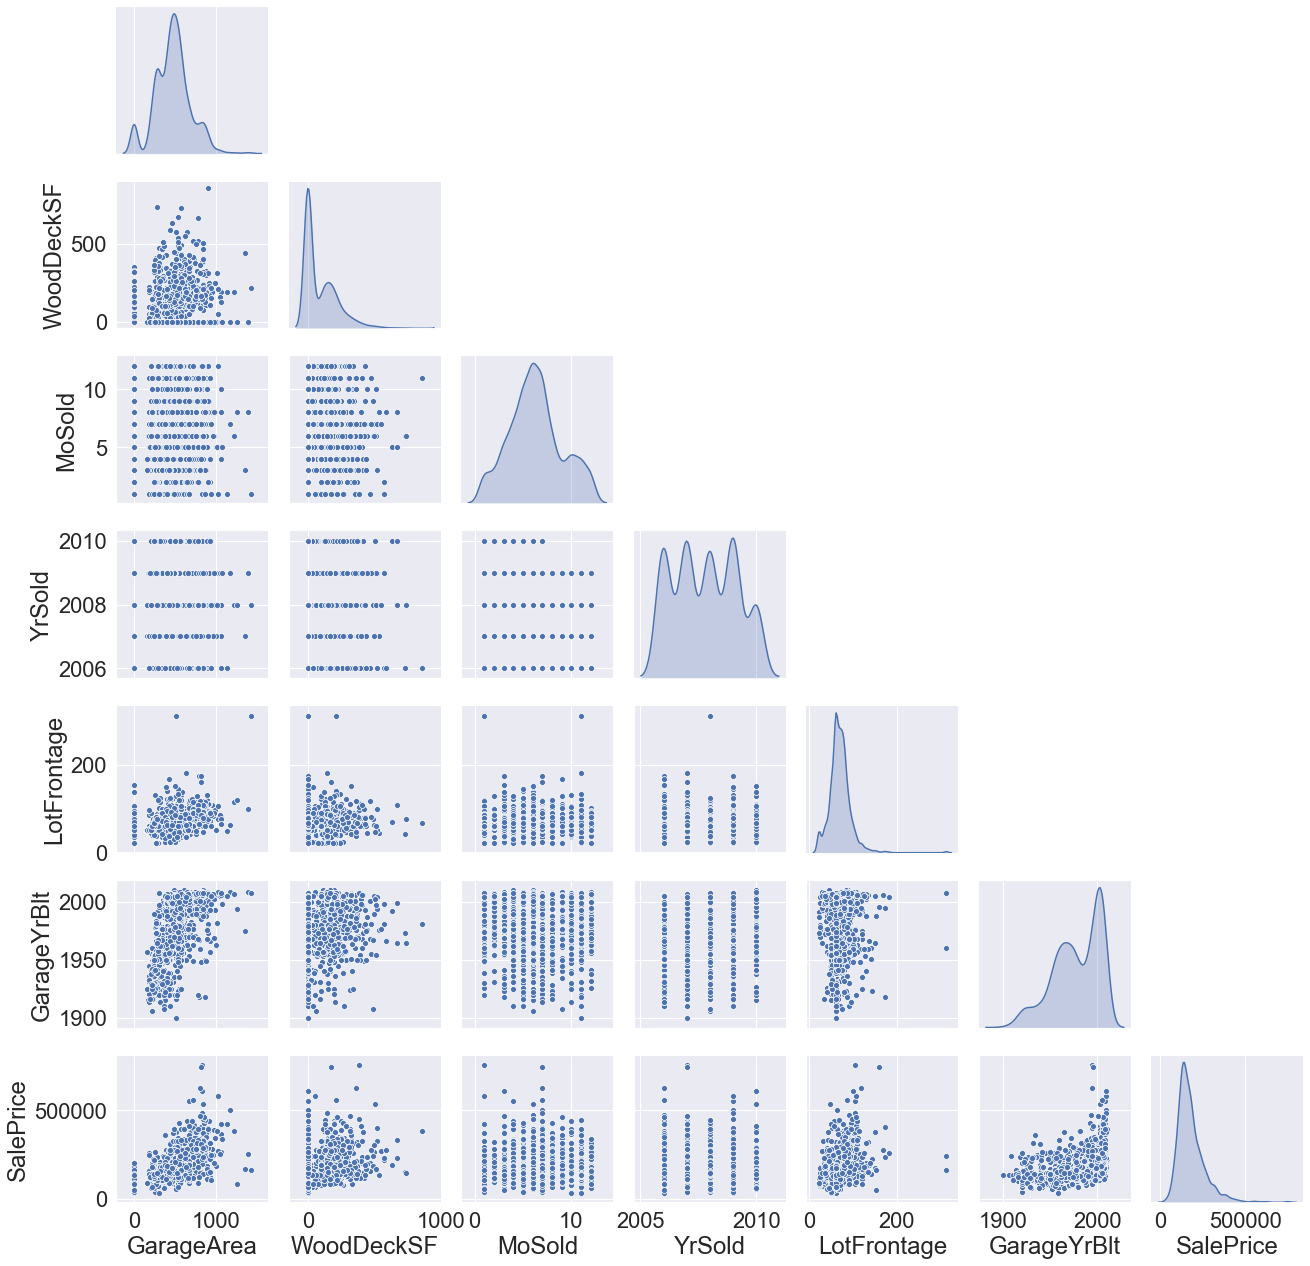

In [14]:
# Ahora veremos la ultima grafica de panesl
nument4 = ent.loc[:,['GarageArea','WoodDeckSF','MoSold','YrSold',
                     'LotFrontage','GarageYrBlt','SalePrice']]
sns.pairplot(nument4, diag_kind = 'kde', corner=True)

En este último caso, parece ser que sólo tenemos una correlación por arriba del 50%, entonces GarageArea puede ser una variable regresora, y tenemos otra variable que podría ser significativa (GarageYrBlt) pero esta más correlacionada con GarageArea que con el precio de venta, entonces en este caso, tal vez sea mejor descartarla del modelo.

<p> </p>
Entonces después de ver la correlación y los graficos de dispersion las variables que podríamos considerar son:

<ul>
<li type="disc">OverallQual.</li>
<li type="disc">GrLivArea.</li>
<li type="disc">GarageCars.</li>
<li type="disc">TotalBsmtSF.</li>
<li type="disc">FullBath.</li>
<li type="disc">YearBuilt.</li>
<li type="disc">MasVnrArea.</li>
<li type="disc">Fireplaces.</li>
</ul>

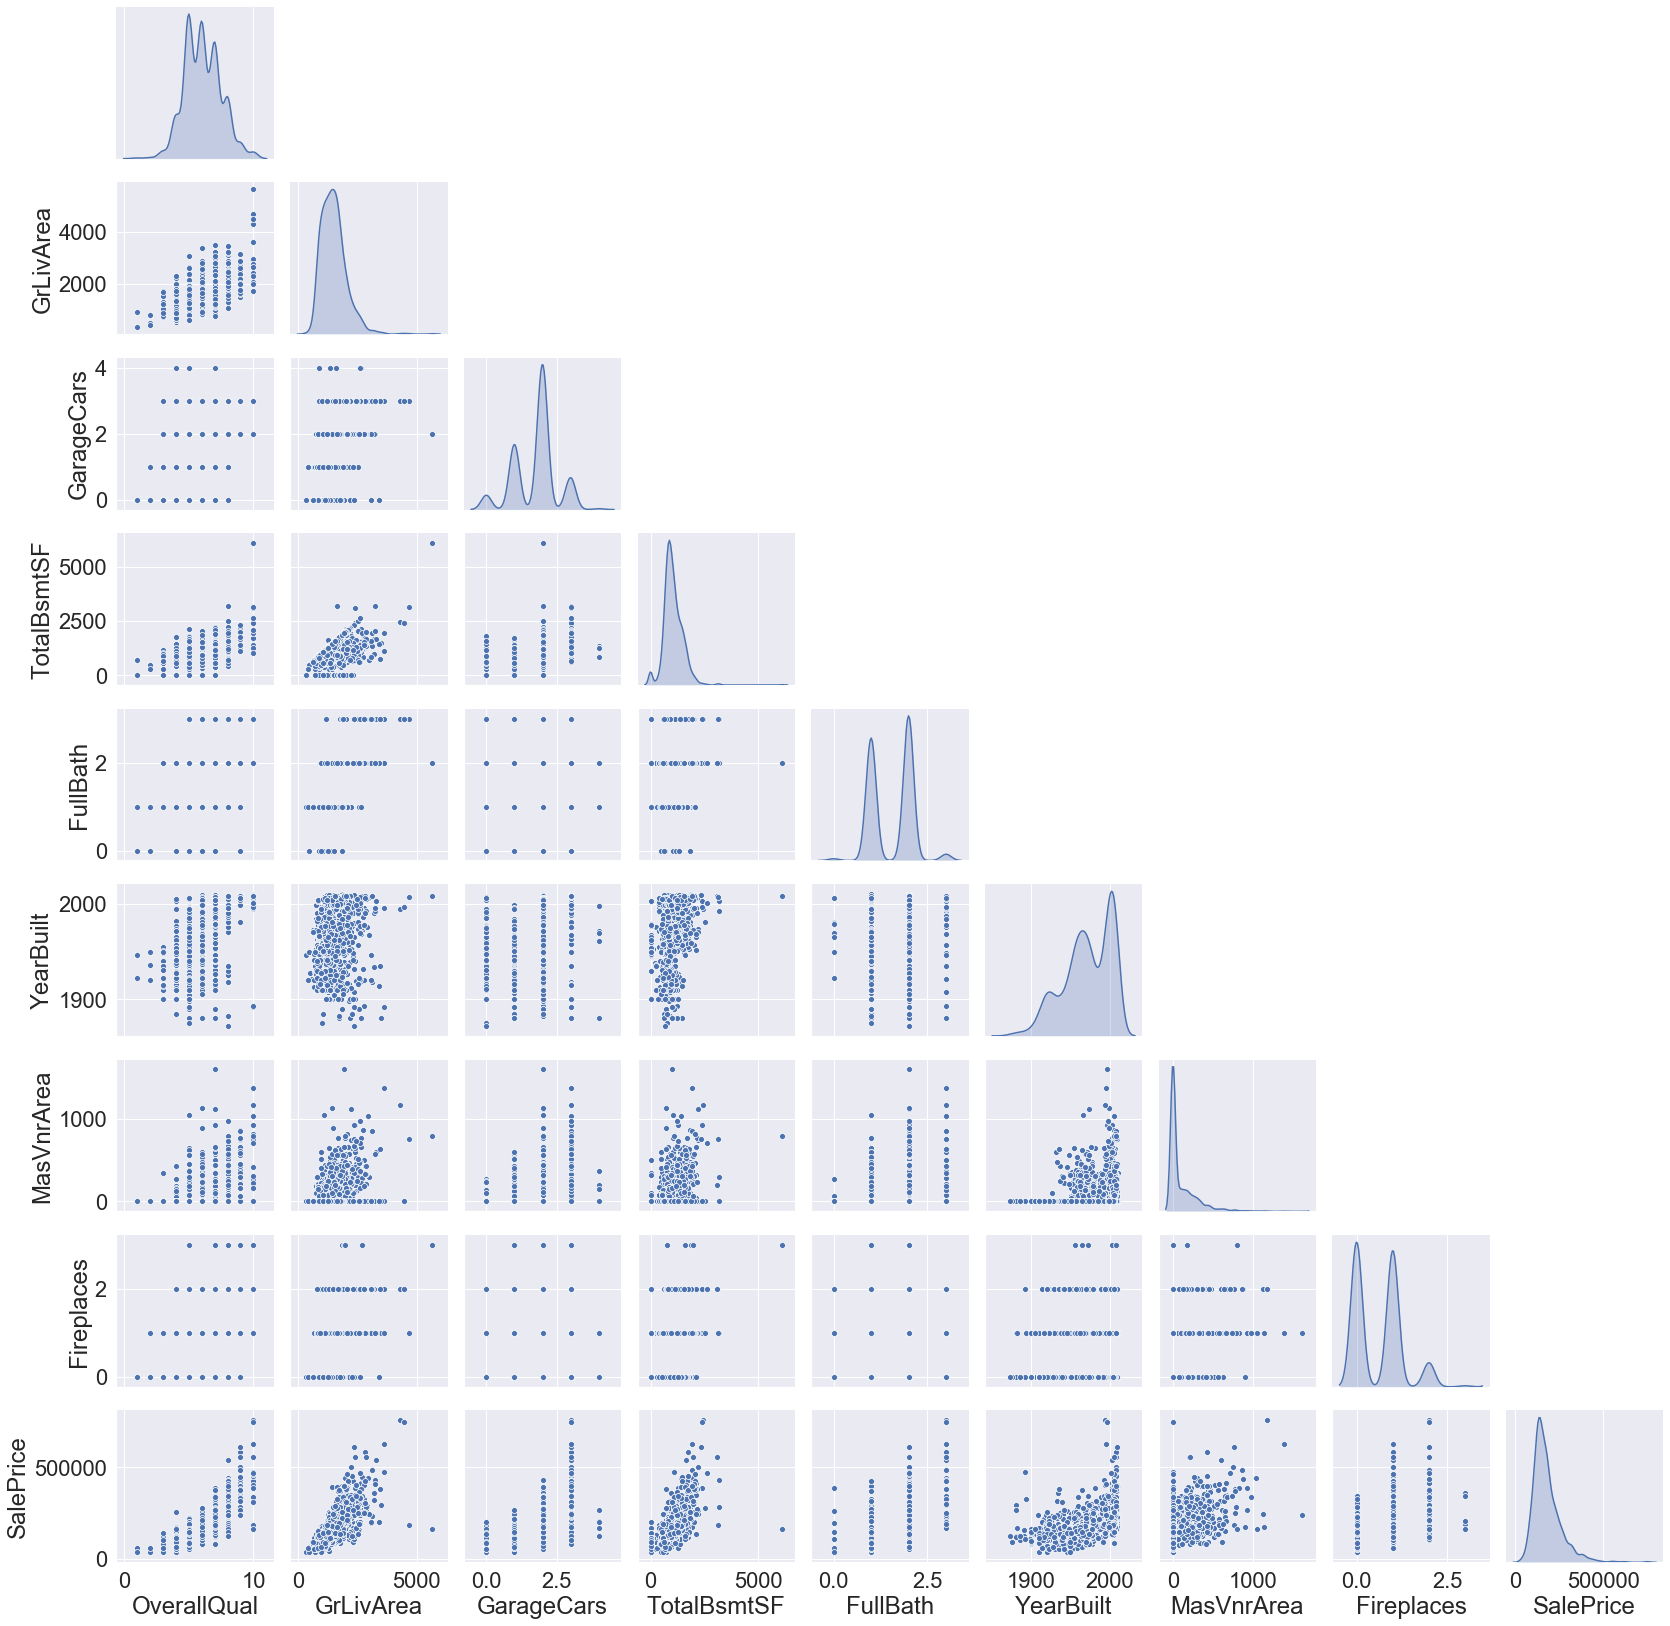

In [15]:
# visualizaremos la seleccion de variables
datnum=ent.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','MasVnrArea','Fireplaces']]
datnum.fillna(0,inplace=True)
df = pd.concat([datnum.reset_index(drop=True), Y], axis=1)
sns.pairplot(df, diag_kind = 'kde', corner=True)

In [16]:
# vemos las correlaciones con la transformacion logaritmica
corrln = df.corr()
corrln.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,SalePrice
OverallQual,1.00,0.59,0.60,0.54,0.55,0.57,0.41,0.40,0.79
GrLivArea,0.59,1.00,0.47,0.45,0.63,0.20,0.39,0.46,0.71
GarageCars,0.60,0.47,1.00,0.43,0.47,0.54,0.36,0.30,0.64
TotalBsmtSF,0.54,0.45,0.43,1.00,0.32,0.39,0.36,0.34,0.61
FullBath,0.55,0.63,0.47,0.32,1.00,0.47,0.27,0.24,0.56
YearBuilt,0.57,0.20,0.54,0.39,0.47,1.00,0.31,0.15,0.52
MasVnrArea,0.41,0.39,0.36,0.36,0.27,0.31,1.00,0.25,0.47
Fireplaces,0.40,0.46,0.30,0.34,0.24,0.15,0.25,1.00,0.47
SalePrice,0.79,0.71,0.64,0.61,0.56,0.52,0.47,0.47,1.00


Con este filtro, ya seleccionamos varias posibles variables, pero debemos tener cuidado con *FullBath* y *YearBuilt* ya que tiene estas variables presentan una mayor correlación con *OverallQual* que con *SalePrice*

## 3. Modelos de regresión

Ajustaremos una regresión lineal, Lasso y Ridge.

### 3.1. Regresión lineal

In [17]:
# Ajustamos el modelo de regresión
lineal = LinearRegression(fit_intercept=True, normalize=False)
# Regresión y ~ x
lineal.fit(datnum,Y)
# Coeficientes del intercepto
lineal.intercept_

-690584.4533296833

In [18]:
# coeficientes de regresion
lineal.coef_

array([19406.78994312,    47.43849702, 13587.596653  ,    26.38277745,
       -3174.58643726,   317.53442637,    28.68811046,  8812.42207652])

In [19]:
# Coeficiente de determinación
lineal.score(datnum, Y)

0.7758581025650308

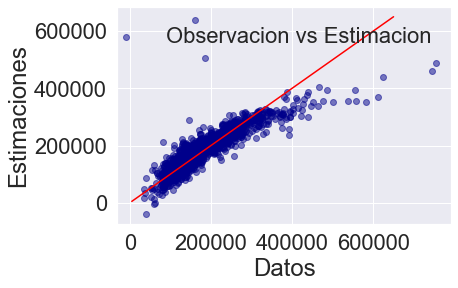

In [20]:
# Valores predichos con los datos de entrenamiento
yp=lineal.predict(datnum)
# valores del precio de venta
ym = Y
# Grafica
plt.scatter(ym, yp, c='darkblue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([5000, 650000], [5000, 650000], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()


En el caso ideal todos los valores deberían estar sobre la recta, pero están dispersos entre la linea, además de que los puntos parecen tener un comportamiento curvo en vez de lineal, por otra partecon forme aumenta el precio de la casa, el modelo parece estar subestimandolo.

In [21]:
# Ahora veamos un resumen más detallado sobre nuestro modelo de regresión
x = sm.add_constant(datnum)
model = sm.OLS(Y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     627.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:55   Log-Likelihood:                -17452.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1451   BIC:                         3.497e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.906e+05      9e+04     -7.673      

El modelo pare que ajusta bien, en el sentido de que estas variables aparentemente sí explican a la variable respuesta en forma lineal, pero tiene varios detalles, en primer lugar, la variable *FullBath* tiene un *p-value* superior al 0.05 y por ende su intervalo de confianza al 5% contiene al cero, por lo tanto esta variable puede ser eliminada, además este modelo parece que sí hace un buen ajuste en cuanto a la asímetria pero no con respecto a la curtosis, por lo tanto se estaría violando el supuesto de normalidad y esto tal vez sea a causa de que posiblemente haya multicolinealidad dentro de nuestros datos.

In [22]:
# si eliminamos la variable de FullBath y aplicamos la transformación
datosnum = datnum.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','MasVnrArea','Fireplaces']]
lineal.fit(datosnum,Ylog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

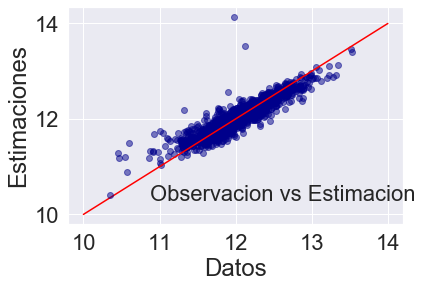

In [23]:
# Valores predichos con los datos de entrenamiento
ylnp=lineal.predict(datosnum)
# valores del precio de venta
ylnm = Ylog
# Grafica
plt.scatter(ylnm, ylnp, c='darkblue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([10,14], [10,14], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()


En este caso la transformación parece que mejoró el comportamiento del modelo en términos generales, sólo que ahora parece que sobre estima algunos valores de casas en el centro.

In [24]:
x1 = sm.add_constant(datosnum)
model1 = sm.OLS(Ylog, x1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     948.9
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 522.91
No. Observations:                1460   AIC:                            -1030.
Df Residuals:                    1452   BIC:                            -987.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8660      0.379     15.485      

Ahora con este modelo la variable *MasVnrArea* tiene problemas ya que tiene un *pvalue>0.05* entonces esta variable en este nuevo movelo ya no es significativa, podríamos descartarla y ver si el ajuste mejora, por otra parte mejoró el coeficiente de determinación y bajo un poco la condición de la matriz  de diseño pero puede seguir persistiendo una posible multicolinealidad. 

In [25]:
datosnum1 = datnum.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Fireplaces']]
x2 = sm.add_constant(datosnum1)
model2 = sm.OLS(Ylog, x2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 522.62
No. Observations:                1460   AIC:                            -1031.
Df Residuals:                    1453   BIC:                            -994.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.9004      0.376     15.690      

Ya no tenemos variables  con *p-values* altos y estadísticamente las variables no presentan coeficiententes iguales a 0, entonces este nuevo conjunto de variables se quita ese problema, además de los tres modelos planteados este modelo tiene el menor AIC y BIC, por lo tanto podría ser un mejor modelo en comparación de los otros dos modelos propuestos.
<p></p>
Pese a las ventajas que obtuvimos aún no parece ser un modelo definitivos, pues dos de sus variables (*GrLivArea* y *TotalBsmtSF*) tienen coeficientes pequeños y por ende sus intervalos de confianza son practicamente 0, además de tener una variable (*YearBuilt*) casi sin error estándar, entonces estas variables pueden causarnos problemas. Así que ajustaremos un último modelo si estas tres variables

In [26]:
datosnum3 = datnum.loc[:,['OverallQual','GrLivArea','GarageCars','YearBuilt','Fireplaces']]
x3 = sm.add_constant(datosnum3)
model3 = sm.OLS(Ylog, x3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1246.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 484.00
No. Observations:                1460   AIC:                            -956.0
Df Residuals:                    1454   BIC:                            -924.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4370      0.382     14.222      

In [27]:
datosnum4 = datnum.loc[:,['OverallQual','GarageCars','TotalBsmtSF','YearBuilt','Fireplaces']]
x4 = sm.add_constant(datosnum4)
model4 = sm.OLS(Ylog, x4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1022.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 369.09
No. Observations:                1460   AIC:                            -726.2
Df Residuals:                    1454   BIC:                            -694.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8290      0.401     19.516      

In [28]:
datosnum5 = datnum.loc[:,['OverallQual','GarageCars','YearBuilt','Fireplaces']]
x5 = sm.add_constant(datosnum5)
model5 = sm.OLS(Ylog, x5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1152.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 310.69
No. Observations:                1460   AIC:                            -611.4
Df Residuals:                    1455   BIC:                            -585.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.4040      0.415     17.821      

In [29]:
datosnum6 = datnum.loc[:,['OverallQual','GarageCars','Fireplaces']]
x6 = sm.add_constant(datosnum6)
model6 = sm.OLS(Ylog, x6)
results6 = model6.fit()
print(results6.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1455.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:                 280.19
No. Observations:                1460   AIC:                            -552.4
Df Residuals:                    1456   BIC:                            -531.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6722      0.024    441.787      

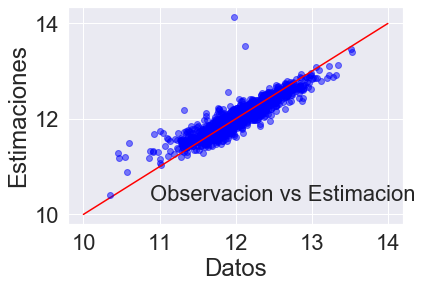

In [30]:
# Valores predichos con los datos de entrenamiento
lineal.fit(datosnum6,Ylog)
lineal.predict(datosnum6)
# valores del precio de venta
# Grafica
plt.scatter(ylnm, ylnp, c='blue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([10, 14], [10, 14], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()

En este caso como dos variables eran candidatas a salir, lo que hicimos fue sacar primero a una variable, despues a otra y por último a las dos de tal forma que vieramos el cambio en los modelos, la ventaja es que la multicolinelidad dismunuyó considerablemente si descartamos a las dos variables a si las consideramos, pero observamos que un aumento en los coeficientes estimados de la regresión, un aumento en los criterios de información y una dismunución en el coeficiente de determinación

### 3.2. Regresión Lasso.

In [31]:
# Ajuste por Lasso
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(datosnum1,Y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

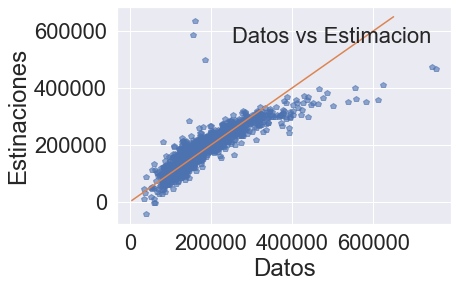

In [32]:
# Grafica del modelo contra los valores
YLp=lasso_model.predict(datosnum1)
plt.plot(Y, YLp,'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([5000, 650000], [5000, 650000])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estinaciones')
plt.show()

In [33]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(datosnum1,Ylog)
lasso_model

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

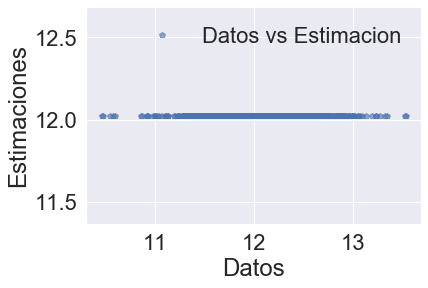

In [34]:
plt.plot(Ylog, lasso_model.predict(datosnum1),'p',alpha=0.6, label='Datos vs Estimacion')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()

La regresión Lasso en el modelo que contempla a la variable sin transformar parece que nos arroja un modeo que se comporta relativamente bien a la hora de dar estimaciones a precios no tan elevados, pero con forme aumente al precio de la casa se subestima el valor de la casa. En cambio cuando tenemos un modelo en donde transformamos la variable respuesta el modelo que nos da no es nada bueno, pues parece que colapsa a la variable.  

### 3.3. Regresión Ridge.

In [35]:
# Regresion Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(datosnum1, Y) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

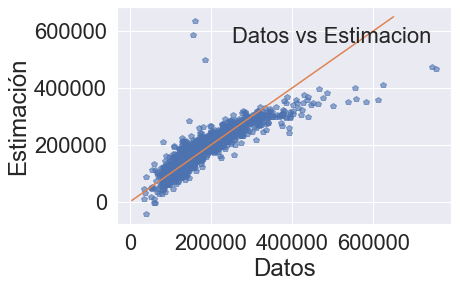

In [36]:
plt.plot(Y, ridge_model.predict(datosnum1),'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([5000, 650000], [5000, 650000])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimación')
plt.show()

In [37]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(datosnum1, Ylog) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

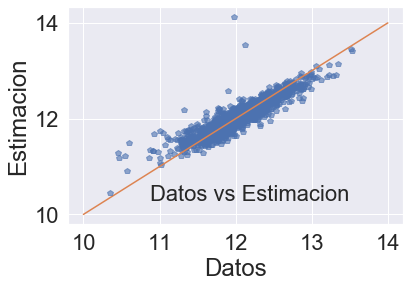

In [38]:
plt.plot(Ylog, ridge_model.predict(datosnum1),'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([10, 14], [10, 14])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimacion')
plt.show()

### 3.4. Interpretación de resultados

Observemos que en términos generales, el modelo que mejor ajusta al precio de venta de casas es el que contempla a las variables *OverallQual*, *GrLivArea*, *GarageCars*, *TotalBsmtSF*, *YearBuilt*, *Fireplaces* y usa como variable respuesta al logaritmo de los precioes, ya que es el que tiene el menor criterio de información y el mayor coeficiente de determinación.
<p></p>
Pero ya cuando empezamos a ajustar todos los modelos notamos que que este modelo falla a la hora de ajustar un modelo Lasso, pese a ese pequeño inconveniente sí tenemos buenos ajustes en la etapa de entrenamiento.

## 4. Predicción

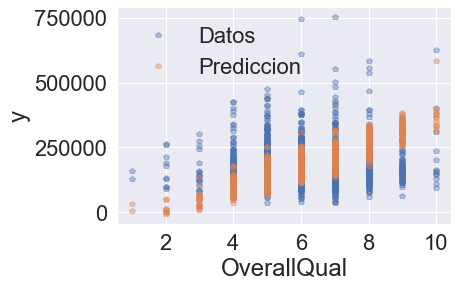

In [39]:
test = pru.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Fireplaces']]
test.fillna(0,inplace=True)
lineal.fit(datosnum1,Y)
yn=lineal.predict(test)
ym=Y[1:1460]

plt.plot(test.OverallQual, ym,'p', label='Datos', alpha=0.4)
plt.plot(test.OverallQual, lineal.predict(test),'p',alpha=0.4, label='Prediccion')
plt.legend(loc='best', frameon=False)
plt.xlabel('OverallQual')
plt.ylabel('y')
plt.show()


El modelo lineal parece que predice relativamente bien a los precios en el sentido de darle una tendencia central pero deja las prediccionesun poco por debajo de lo esperado, entonces esto nos quiere decir que tuvimos un desempeño aceptable en la parte de entrenamiento, pero en la predicción parece que tuvo un peor desempeño.

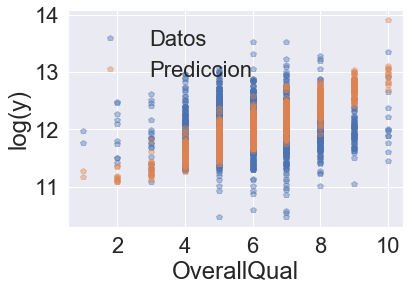

In [40]:
lineal.fit(datosnum1,Ylog)
yn=lineal.predict(test)
ylm=Ylog[1:1460]
plt.plot(test.OverallQual, ylm,'p', label='Datos', alpha=0.4)
plt.plot(test.OverallQual, lineal.predict(test),'p',alpha=0.4, label='Prediccion')
plt.legend(loc='best', frameon=False)
plt.xlabel('OverallQual')
plt.ylabel('log(y)')
plt.show()


La predicción por logaritmo en la etapa de entrenamiento mostró un gran desempeño, incluso mejor que el modelo que no contempla a la transformación logaritmica, pero en esta etapa el modelo una ve más nos marca una tendencia lineal pero los datos muestran otro comportamiento, entonces nos encontramos en una pequeña encruzijada.

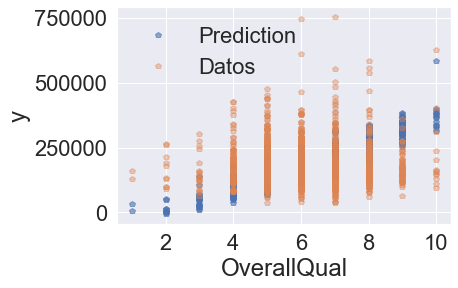

In [41]:
# Reajustamos Lasso
lasso_model.fit(datosnum1,Y)
ynl=lasso_model.predict(test)
# Pintamos las graficas
plt.plot(test.OverallQual, ynl,'p',alpha=0.6, label='Prediction')
plt.plot(test.OverallQual, ym,'p', label='Datos', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('OverallQual')
plt.ylabel('y')
plt.show()

La regresión Lasso parece que hereda el comportamiento mostrado por la regresión lineal múltiple, por lo tanto la predicción no parece ser muy buena.

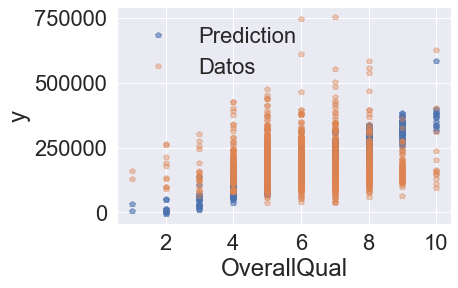

In [42]:
# Reajustamos Ridge
ridge_model.fit(datosnum1, Y)
ynr=ridge_model.predict(test)
# Pintamos las graficas
plt.plot(test.OverallQual, ynr,'p',alpha=0.6, label='Prediction')
plt.plot(test.OverallQual, ym,'p', label='Datos', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('OverallQual')
plt.ylabel('y')
plt.show()


No parece haber cambios significativos.

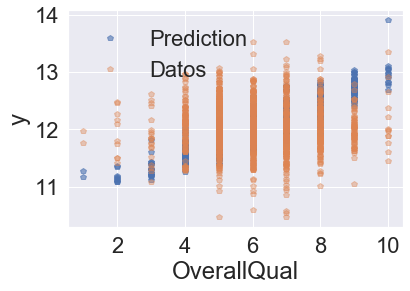

In [43]:
# Reajustamos Ridge
ridge_model.fit(datosnum1, Ylog)
ynr1=ridge_model.predict(test)
# Pintamos las graficas
plt.plot(test.OverallQual, ynr1,'p',alpha=0.6, label='Prediction')
plt.plot(test.OverallQual, ylm,'p', label='Datos', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('OverallQual')
plt.ylabel('y')
plt.show()

Al parecer hereda el comportamiento mostrado por la regresión lineal multiple

## 5. Conclusiones.

La base de datos que utilizamos para hacer el ajuste del modelo tiene muchas variables de interes, ya que tenemos multiples variables que inicialmente pueden afectar el precio de una casa, colo lo es el area de construcción, el area del terreno, el numero de cuartos, baños, cocinas, garages, entre otras, pero hay factores externos que pueden alterar drasticamente el precio de una casa, como lo es su localización o los servicios que tienen al rededor el inmueble, por lo tanto, no es tan facil predecir el precio de una casa.
<p></p>
Con forme a nuestro análsis podemos pensar que las variables que alteran (al menos de forma lineal) al precio de una casa son:
el material con el que se dan los acabados a la construcción, la superficia habitable, la capacidad del garage, el area destinada para el sótano, la antiguedad de la casa y el numero de chimeneas.
<p></p>
En terminos generales, si solo usamos al modelo que tiene directamente al precio de las casas, entonces tenemos un modelo relativamente bueno cuando hablamos de estimar precios inferiores a 400,000 dolares, ya cuando el precio aumente, entonces tenemos un modelo un tanto deficiente ya que subestima el precio de algunas casas (lujosas), pero si ajustamos al modelo la variable del logaritmo del precio, entonces la situación cambia, pues mejora su rendimiento, aunque encontramos algunos problemas para el modelo Lasso.
<p></p>
Pese a no ser un modelo perfecto, podemos decir que es primer acercamiento bueno, ya que si logramos capturar algo de la tendencia de nuestros datos.